# This is code snippt for testting BI-LSTM attention mode for CIC_IoT2023 DATASET
- # scroll down to see the code and their execution results for ROC, and other curves and related codes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras
!pip install tensorflow==2.15

print(f"Keras version: {keras.__version__}")


print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
for device in tf.config.list_physical_devices('GPU'):
    print(device)


In [ ]:
DATASET_DIRECTORY = '/content/drive/MyDrive/IDS-Research/CICIoT2023/CICIoT2023/'


In [ ]:
!import tensorflow as tf

!pip install tensorflow==2.15.0


print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

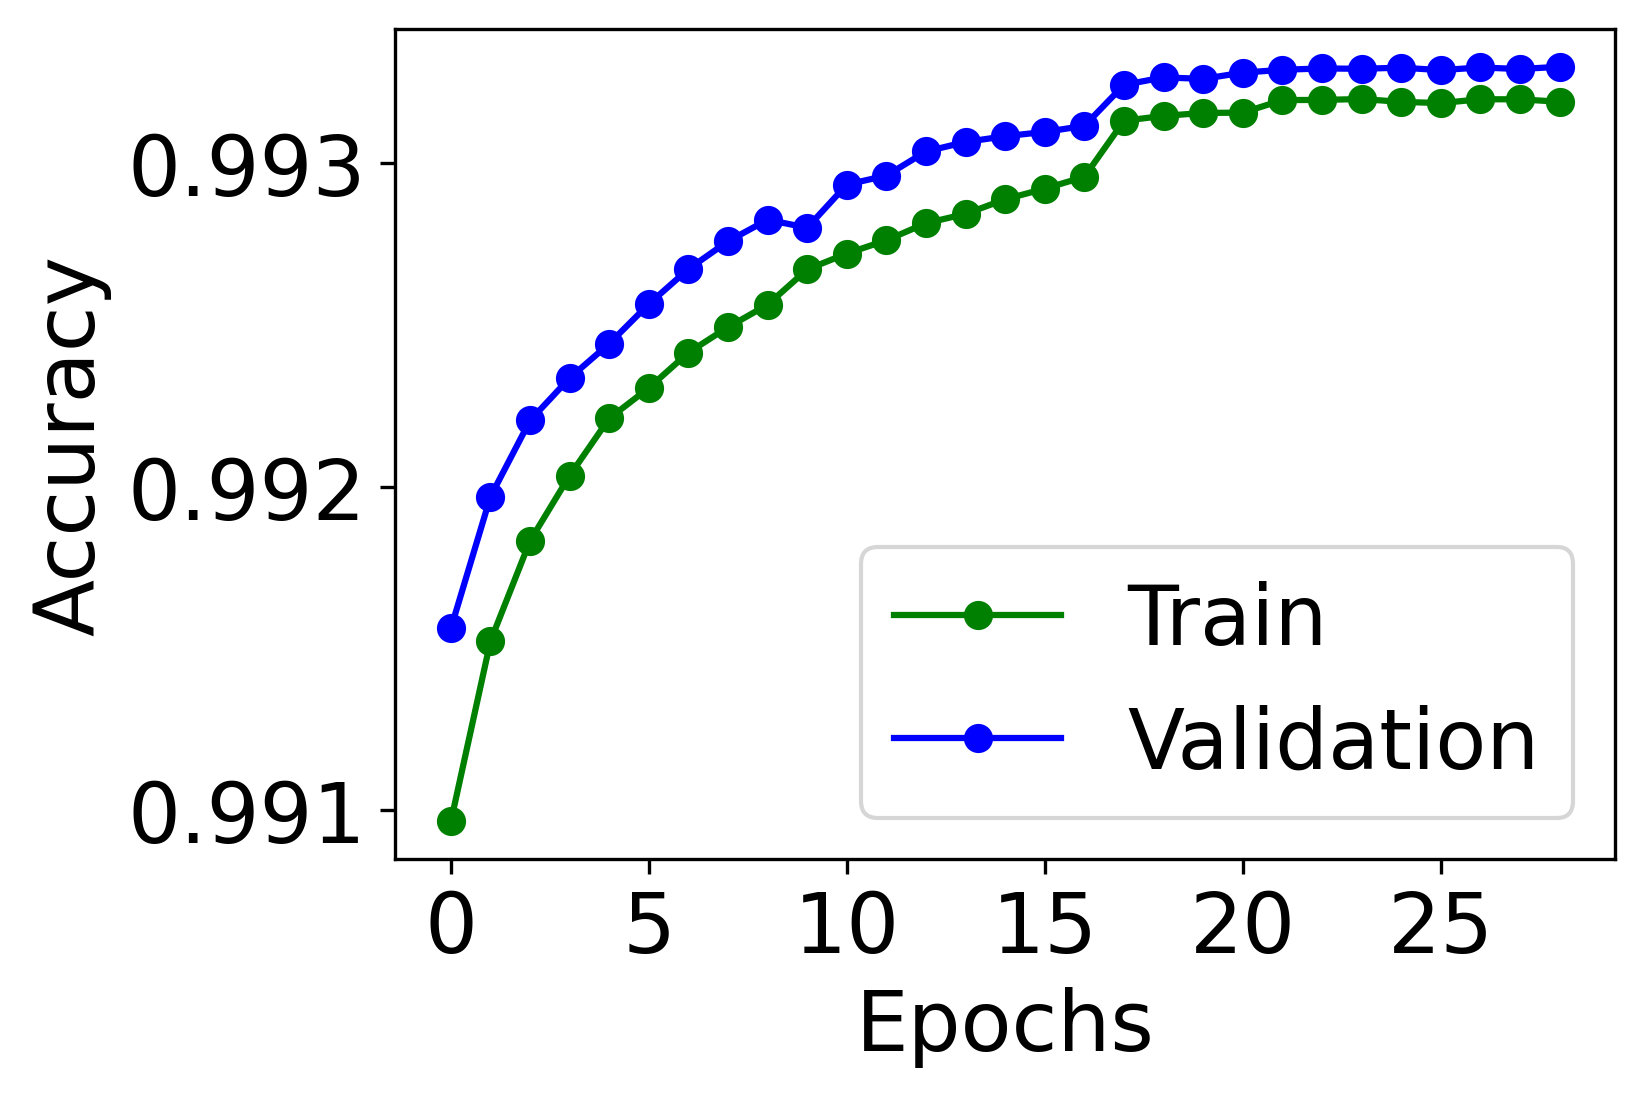

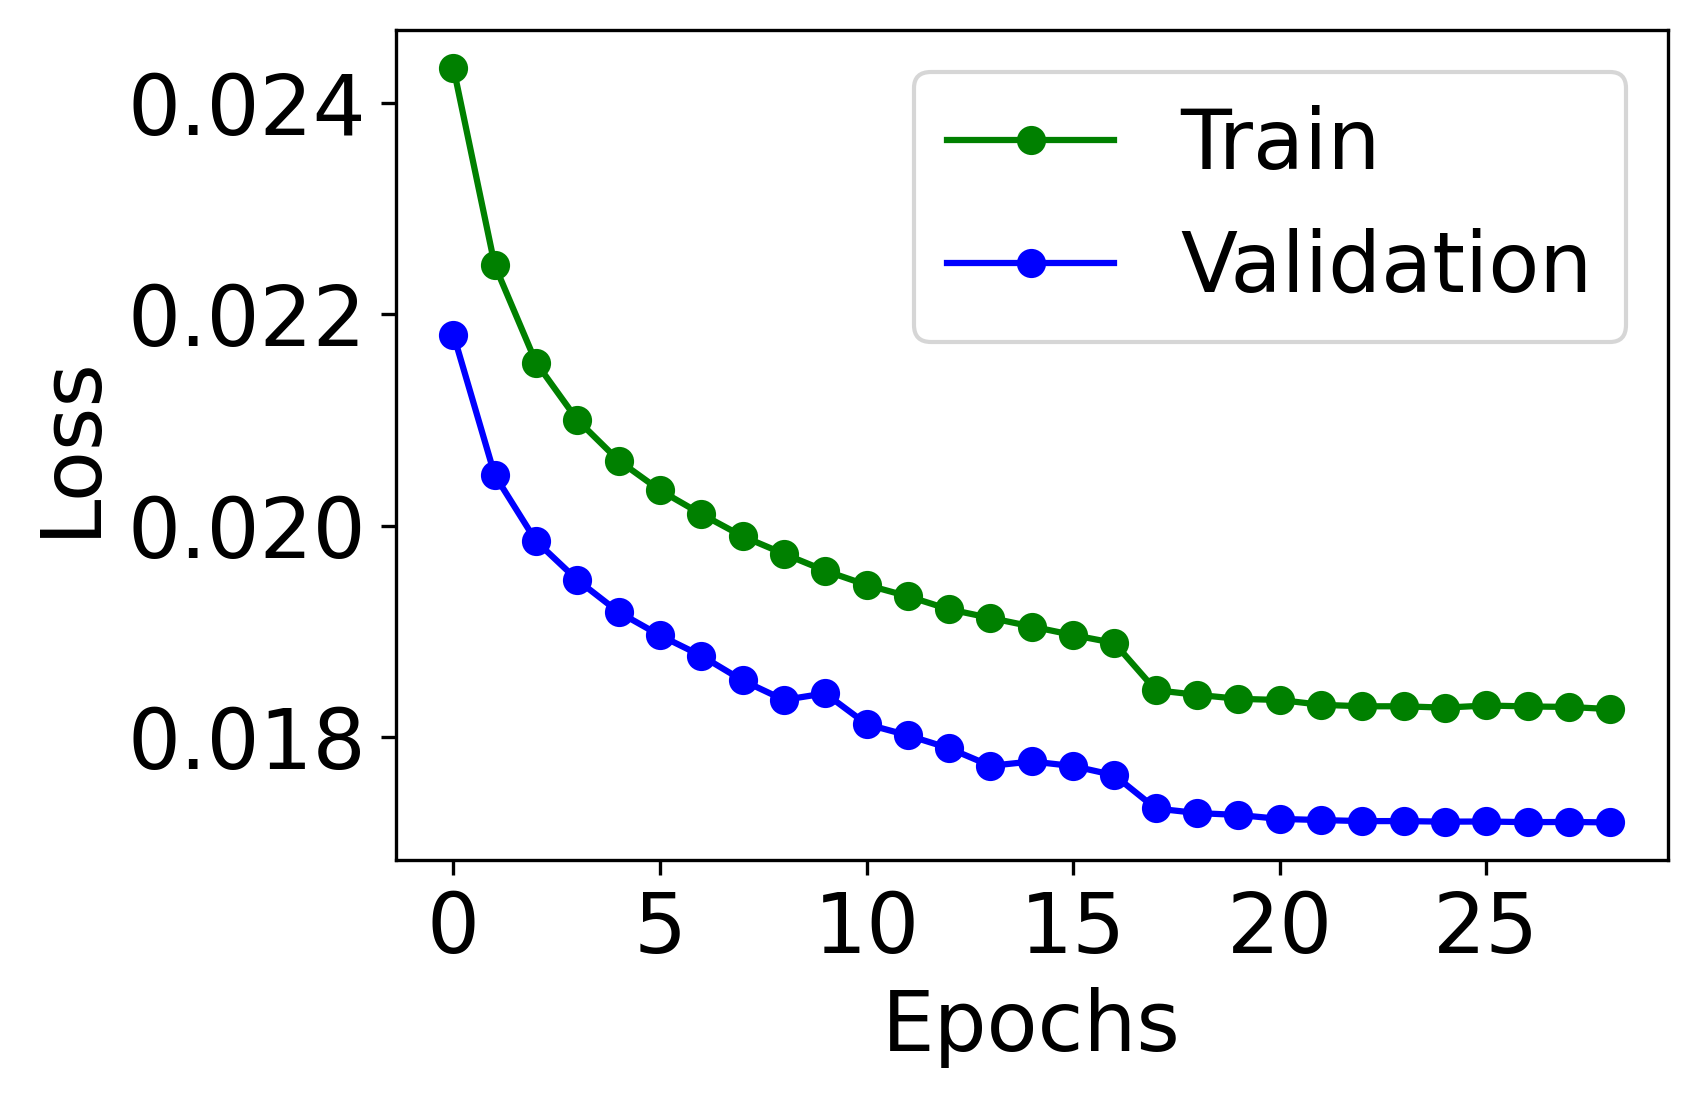

291792/291792 [==============================] - 785s 3ms/step
Classification Report:
              precision    recall  f1-score   support

        DDoS       0.86      0.95      0.91    219344
  BruteForce       0.94      0.18      0.30      2615
       Mirai       1.00      1.00      1.00   6795431
      Benign       1.00      1.00      1.00   1618443
    Spoofing       1.00      1.00      1.00    528107
       Recon       0.81      0.72      0.76     70873
         Dos       0.83      0.76      0.79     97511
         Web       0.78      0.14      0.24      4992

    accuracy                           0.99   9337316
   macro avg       0.90      0.72      0.75   9337316
weighted avg       0.99      0.99      0.99   9337316

Overall Accuracy: 0.9933
Overall Precision: 0.9020
Overall Recall: 0.7183
Overall F1-score: 0.7496
Overall FPR: 0.0980
DDoS: Accuracy=0.9954, Precision=0.8643, Recall=0.9521, F1-score=0.9061, FPR=0.1357
BruteForce: Accuracy=0.9998, Precision=0.9430, Recall=0.1771

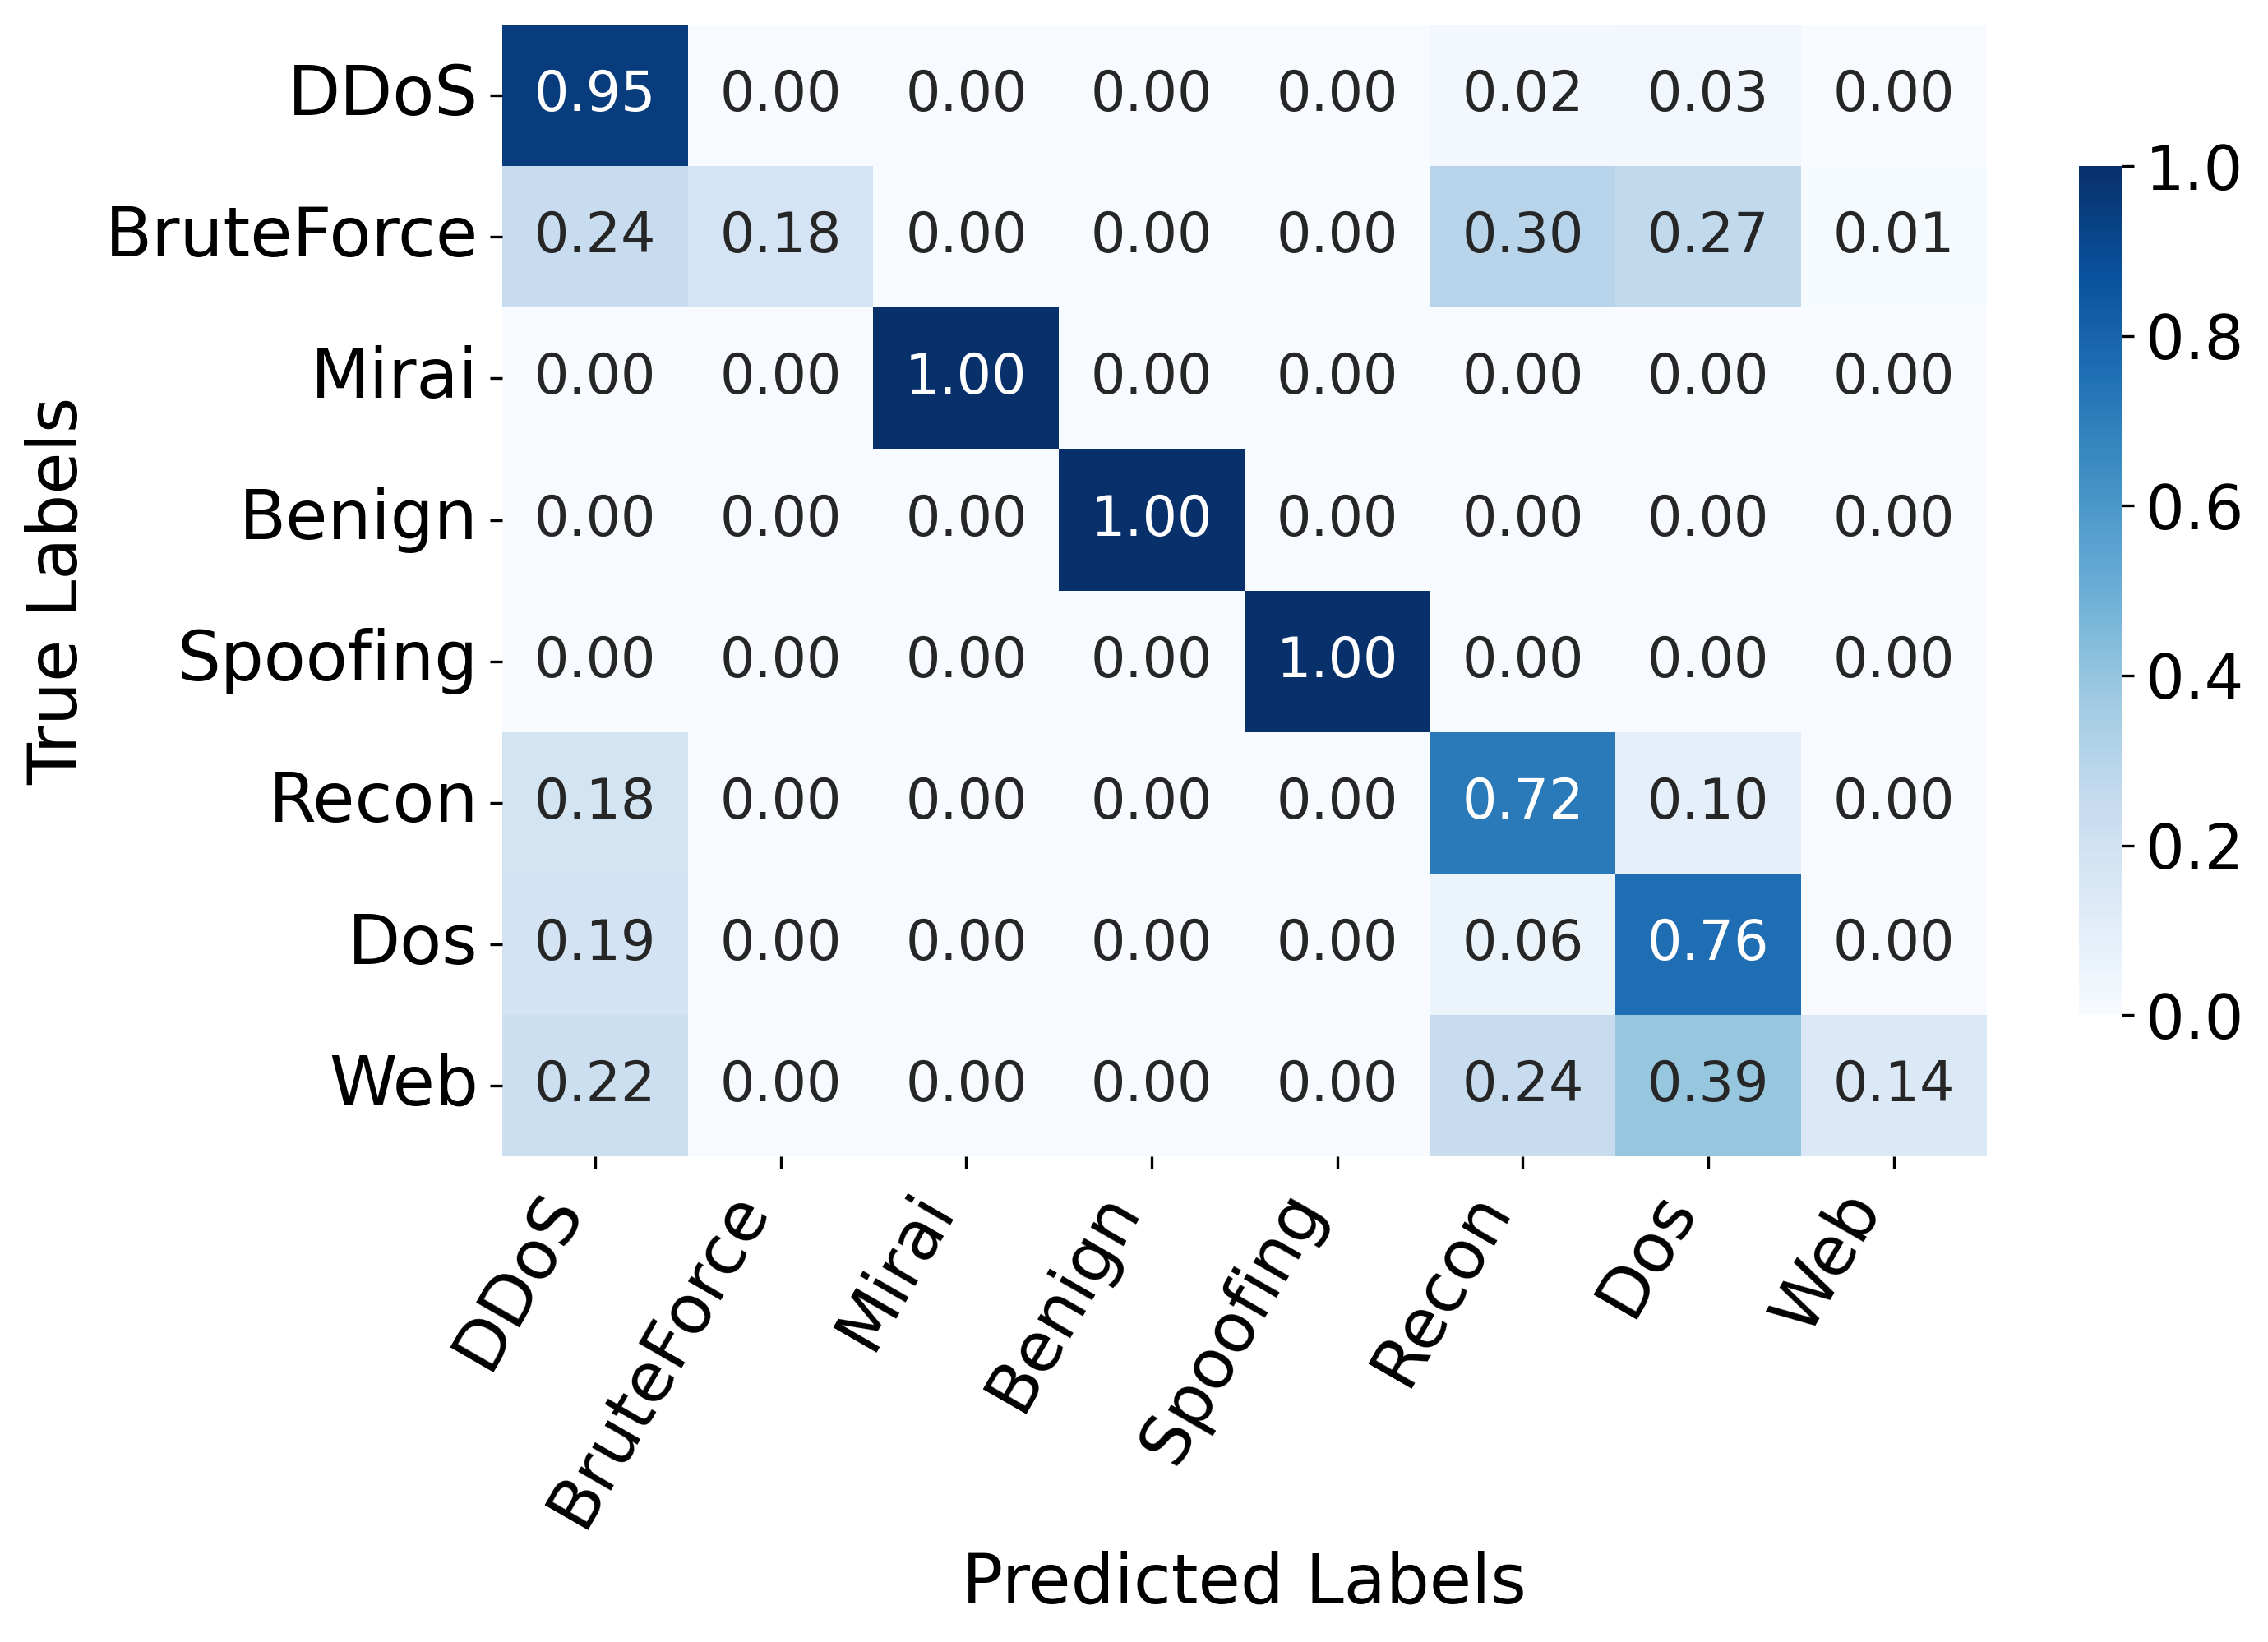

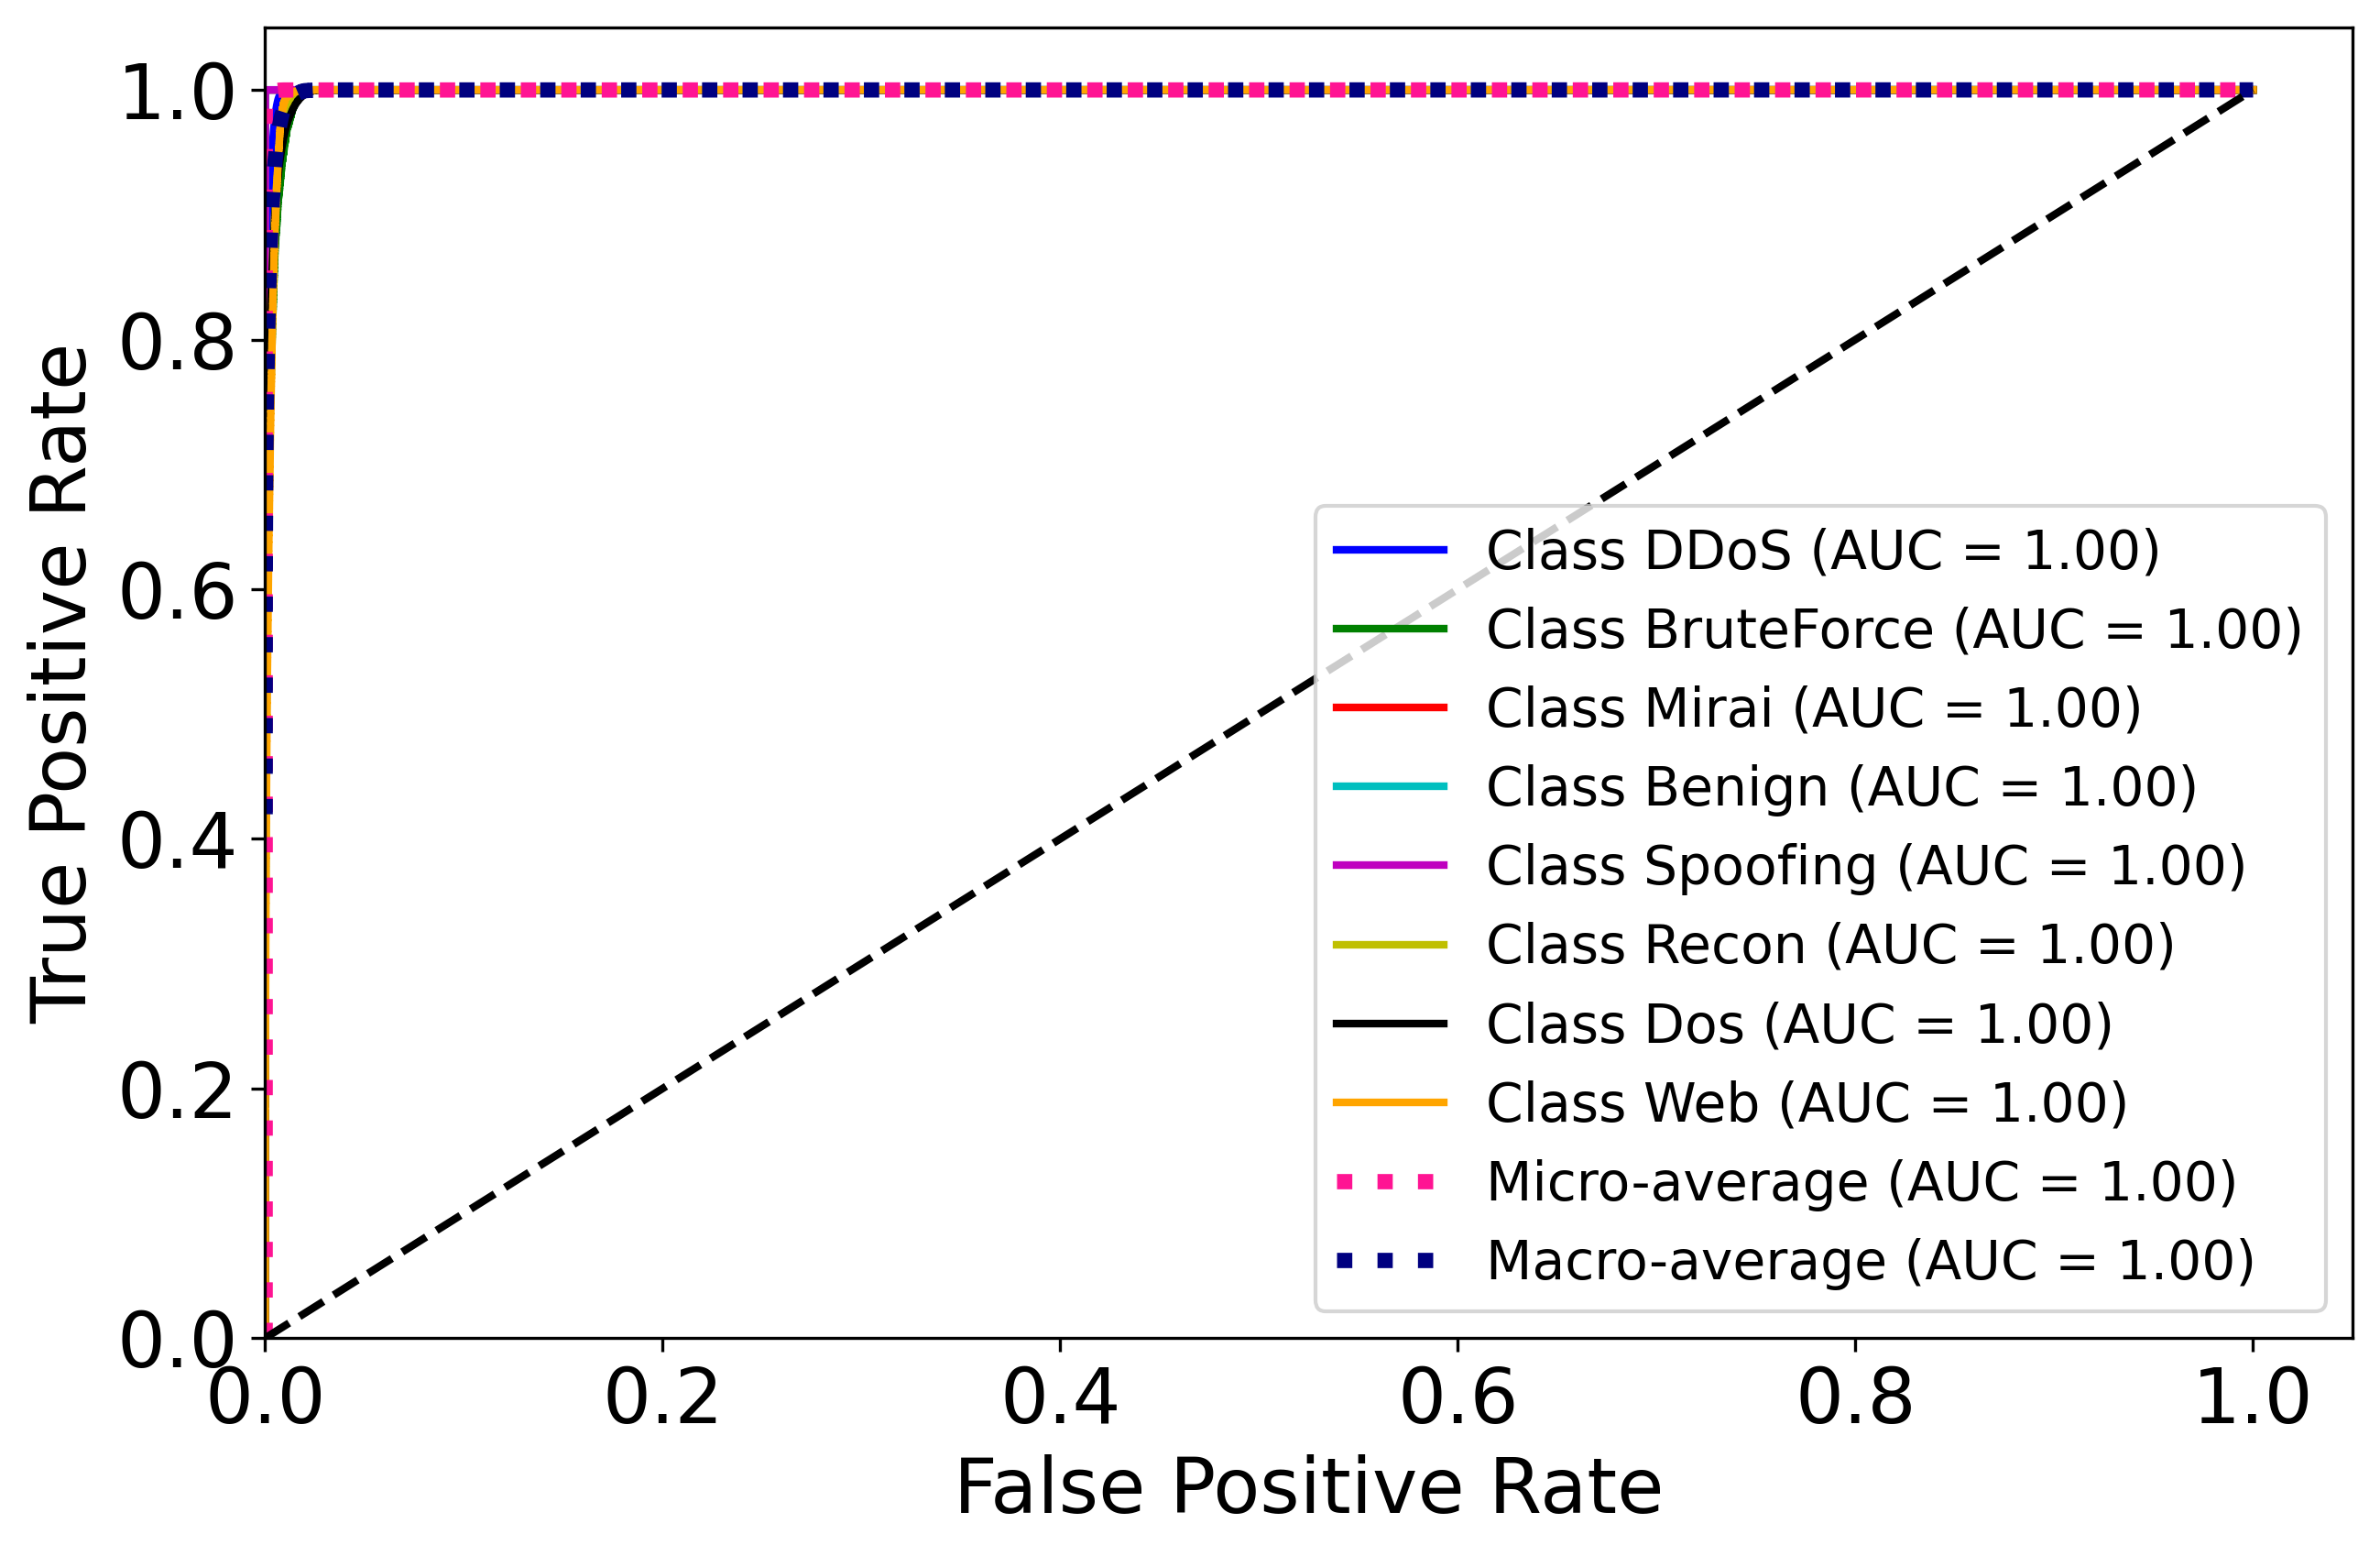

In [ ]:

### Test script Dece.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
import os
from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define paths
model_checkpoint_filepath = '/content/drive/MyDrive/IDS-Research/BI_LSTM_Attention_CICIoT2023_Dec_14.h5'
save_dir = '/content/drive/MyDrive/IDS-Research/CICIoT2023_plots_train_test_set'

# Load the datasets using the correct filenames
X_train = np.load(os.path.join(save_dir, 'X_train.npy'))
X_test = np.load(os.path.join(save_dir, 'X_test.npy'))
Y_train = np.load(os.path.join(save_dir, 'y_train.npy'))
Y_test = np.load(os.path.join(save_dir, 'y_test.npy'))

# Create the save directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Reload the model
loaded_model = load_model(model_checkpoint_filepath)

# Adjust font sizes
plt.rcParams.update({'font.size': 18, 'axes.labelsize': 18, 'legend.fontsize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18})

# Reload the history
history_filepath = '/content/drive/MyDrive/IDS-Research/CICIoT2023_0814_history.npz'
history = np.load(history_filepath)
accuracy = history['accuracy'][1:]
val_accuracy = history['val_accuracy'][1:]
loss = history['loss'][1:]
val_loss = history['val_loss'][1:]

# Plot training & validation accuracy
plt.figure(figsize=(6.0, 4.0), dpi=300)
plt.plot(accuracy, color="green", marker='o', label='Train')
plt.plot(val_accuracy, color="blue", marker='o', label='Validation')
plt.title('', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.xticks(np.arange(0, len(accuracy), step=5), fontsize=20)  # Set x-ticks to step value of 5
plt.yticks(fontsize=20)
plt.legend(loc='lower right', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Accuracy_CICIoT2023_0814_SP_1106.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

# Plot training & validation loss
plt.figure(figsize=(6.0, 4.0), dpi=300)
plt.plot(loss, color="green", marker='o', label='Train')
plt.plot(val_loss, color="blue", marker='o', label='Validation')
plt.title('', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.xticks(np.arange(0, len(loss), step=5), fontsize=20)  # Set x-ticks to step value of 5
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Loss_CICIoT2023_0814_SP_1106.jpeg'), format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

# Load test data and make predictions
X_test = X_test
y_test = Y_test
y_pred_probs = loaded_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
encoder = LabelEncoder()
encoder.classes_ = np.array(['DDoS', 'BruteForce', 'Mirai', 'Benign', 'Spoofing', 'Recon', 'Dos', 'Web'])
class_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print("Classification Report:")
print(class_report)

# Compute overall performance metrics with macro average
overall_accuracy = accuracy_score(y_test, y_pred)
overall_precision = precision_score(y_test, y_pred, average='macro')
overall_recall = recall_score(y_test, y_pred, average='macro')
overall_f1 = f1_score(y_test, y_pred, average='macro')
overall_fpr = 1 - overall_precision  # For overall FPR, calculated as 1 - precision

print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-score: {overall_f1:.4f}")
print(f"Overall FPR: {overall_fpr:.4f}")

# Compute and display class-wise metrics - micro
for i, class_name in enumerate(encoder.classes_):
    class_accuracy = accuracy_score(y_test == i, y_pred == i)
    class_precision = precision_score(y_test, y_pred, labels=[i], average='macro', zero_division=0)
    class_recall = recall_score(y_test, y_pred, labels=[i], average='macro', zero_division=0)
    class_f1 = f1_score(y_test, y_pred, labels=[i], average='macro', zero_division=0)
    class_fpr = 1 - class_precision  # Class-wise FPR

    print(f"{class_name}: Accuracy={class_accuracy:.4f}, Precision={class_precision:.4f}, Recall={class_recall:.4f}, F1-score={class_f1:.4f}, FPR={class_fpr:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(10.0, 7.0), dpi=300)  # Adjusted size for clarity
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_,
            cbar_kws={'shrink': 0.75,'ticks': np.arange(0.0, 1.1, 0.2)},annot_kws={"size": 16},vmin=0.0, vmax=1.0)  # Increase line thickness


plt.xlabel('Predicted Labels', fontsize=20)
plt.ylabel('True Labels', fontsize=20)
plt.xticks(fontsize=20, rotation=60,ha='right')
plt.yticks(fontsize=20, rotation=0)
# Tight layout to prevent clipping of the labels
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, 'Confusion_Matrix_CICIoT2023_0814_SP_1108.jpeg'), dpi=300, format='jpeg', bbox_inches='tight')
plt.show()

### Roc-CURVE
#  Binarize the labels for multiclass classification
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute ROC curve and AUC for micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute ROC curve and AUC for macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves for each class, micro-average, and macro-average
plt.figure(figsize=(9.0, 6.0), dpi=300)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average and macro-average curves
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})', color='navy', linestyle=':', linewidth=4)

# Add reference line and labels
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize=20)  # Set x-ticks
plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize=20)  # Set y-ticks

# Adjust the legend position to avoid overlap
plt.legend(loc="lower right", fontsize=14)

# Save and show the plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'ROC_Curve_with_Micro_Macro_averages.jpeg'), dpi=300, bbox_inches='tight')
plt.show()

